In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bubble_data = pd.read_excel("BubblesExcel2.xlsx")
bubble_data.head().T


,0,1,2,3,4
StartDate,Start Date,2019-10-23 15:25:11,2019-10-23 15:39:47,2019-10-23 15:36:48,2019-10-23 17:48:44
EndDate,End Date,2019-10-23 15:30:05,2019-10-23 15:41:32,2019-10-23 15:51:08,2019-10-23 17:49:43
Status,Response Type,IP Address,IP Address,IP Address,IP Address
IPAddress,IP Address,128.237.170.60,107.242.117.9,128.237.124.47,73.154.255.208
Progress,Progress,100,100,100,100
Duration (in seconds),Duration (in seconds),294,105,860,59
Finished,Finished,True,True,True,True
RecordedDate,Recorded Date,2019-10-23 15:30:06.147000,2019-10-23 15:41:33.030000,2019-10-23 15:51:08.888000,2019-10-23 17:49:43.969000
ResponseId,Response ID,R_2wGmDIQ8EIbejyN,R_2xzcX5kr5rQKXeP,R_2vkUsIdMKOovP8L,R_2uxhZhVvOgtf3CP
RecipientLastName,Recipient Last Name,NaN,NaN,NaN,NaN


### Clean Dataframe
#### Remove uneeded columns and rename

In [4]:
clean_data = bubble_data.drop(["StartDate", "EndDate", "Status", "Progress", 
                               "IPAddress", "Finished","RecordedDate","ResponseId", "RecipientLastName",
                              "RecipientFirstName","RecipientEmail","ExternalReference",
                              "LocationLatitude", "LocationLongitude","DistributionChannel",
                              "UserLanguage", ], axis=1)

column_names = ['Duration', 'Gender', 'Age', 'HomeCollege', 'Political', 'Religion', "ReligionOther",
               'ReligionStrength', 'HouseIncome', 'Ethnicity', 'Company', 'CompanyExplain', 'Lipstick', 
                'LipstickExplain', 'Soup', 'SoupExplain', 'Volunteer', 'VolunteerExplain', 'WealthRank', 'InclusivenessRank', 
                'StatusRank', 'CompassionRank', 'FairnessRank', 'GenerosityRank','CommitmentRank']
clean_data.columns = column_names
clean_data.head()

,Duration,Gender,Age,HomeCollege,Political,Religion,ReligionOther,ReligionStrength,HouseIncome,Ethnicity,...,SoupExplain,Volunteer,VolunteerExplain,WealthRank,InclusivenessRank,StatusRank,CompassionRank,FairnessRank,GenerosityRank,CommitmentRank
0,Duration (in seconds),What gender do you identify as?,What is your age?,What college are you affiliated with at Carneg...,What is your political affiliation? - Politica...,What is your religious affiliation? - Selected...,What is your religious affiliation? - Other: -...,What is the strength of your religious affilia...,What is your family household income?,What is your ethnicity?,...,Briefly explain the logic behind your decision.,The company you are currently working at begin...,Briefly explain the logic behind your decision.,Rank the following values from 1 to 7 based on...,Rank the following values from 1 to 7 based on...,Rank the following values from 1 to 7 based on...,Rank the following values from 1 to 7 based on...,Rank the following values from 1 to 7 based on...,Rank the following values from 1 to 7 based on...,Rank the following values from 1 to 7 based on...
1,294,Male,18-24,Tepper School of Buisness,Very Conservative,Catholic,NaN,Moderate strength,">$150,000",Caucasian,...,Some people will really need the support that ...,Yes,Career progression. I can do real volunteering...,1,7,6,4,3,5,2
2,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,3,4,1,5,6,7
3,860,Male,18-24,Mellon College of Science,Very Conservative,Christian,NaN,Very Strong,"$100,000-$150,000",Caucasian,...,If the soup kitchens are hindering the motivat...,No,I feel like it would be a waste of time if we ...,6,4,7,2,5,3,1
4,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove Bad Rows
#### Remove description row and rows with low duration responses

In [5]:
clean_data = clean_data.iloc[1:]
clean_data = clean_data[ pd.to_numeric(clean_data['Duration']) > 120 ]
#clean_data[ clean_data['Age'] == 'NaN'] 

In [6]:
clean_data

,Duration,Gender,Age,HomeCollege,Political,Religion,ReligionOther,ReligionStrength,HouseIncome,Ethnicity,...,SoupExplain,Volunteer,VolunteerExplain,WealthRank,InclusivenessRank,StatusRank,CompassionRank,FairnessRank,GenerosityRank,CommitmentRank
1,294,Male,18-24,Tepper School of Buisness,Very Conservative,Catholic,NaN,Moderate strength,">$150,000",Caucasian,...,Some people will really need the support that ...,Yes,Career progression. I can do real volunteering...,1,7,6,4,3,5,2
3,860,Male,18-24,Mellon College of Science,Very Conservative,Christian,NaN,Very Strong,"$100,000-$150,000",Caucasian,...,If the soup kitchens are hindering the motivat...,No,I feel like it would be a waste of time if we ...,6,4,7,2,5,3,1
5,150,Female,18-24,Dietrich College of Humanities and Social Scie...,Somewhat Conservative,Christian,NaN,Very Strong,">$150,000",Asian,...,NaN,No,NaN,5,7,4,2,6,1,3
6,567,Male,18-24,School of Computer Science,Somewhat Liberal,Christian,NaN,Very Strong,"<$60,000",Asian,...,In my understanding the soup kitchen could hel...,Yes,It's like a company paid holiday. I'm not tell...,6,4,7,1,2,5,3
7,856,Male,18-24,School of Computer Science,NaN,Christian,NaN,Little strength,">$150,000",Hispanic/Latino,...,The Catholic Church recently performed a study...,Yes,"Try to help them, who knows what will happen. ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,430,Male,18-24,College of Engineering,Moderate,Unaffiliated,NaN,No strength,">$150,000",Caucasian,...,It is worthwhile to give back to the soup kitc...,Yes,I can enjoy a trip from time to time,7,5,6,1,3,4,2
113,1167,Male,18-24,College of Engineering,Moderate,Catholic,NaN,Moderate strength,">$150,000",Caucasian,...,It still worth helping those people that are h...,Yes,It still is beneficial for my job and prioriti...,5,6,7,1,2,4,3
114,140,Female,18-24,Mellon College of Science,Somewhat Liberal,Christian,NaN,Little strength,">$150,000",Caucasian,...,NaN,Yes,NaN,4,5,7,3,6,1,2
115,693,Male,18-24,School of Computer Science,Moderate,Unaffiliated,NaN,Very Strong,">$150,000",Asian,...,If its inhibiting their ability to improve the...,Yes,Vacation time. Theres no advantage to not goin...,3,6,7,5,1,4,2


In [7]:
clean_data.head().T

,1,3,5,6,7
Duration,294,860,150,567,856
Gender,Male,Male,Female,Male,Male
Age,18-24,18-24,18-24,18-24,18-24
HomeCollege,Tepper School of Buisness,Mellon College of Science,Dietrich College of Humanities and Social Scie...,School of Computer Science,School of Computer Science
Political,Very Conservative,Very Conservative,Somewhat Conservative,Somewhat Liberal,NaN
Religion,Catholic,Christian,Christian,Christian,Christian
ReligionOther,NaN,NaN,NaN,NaN,NaN
ReligionStrength,Moderate strength,Very Strong,Very Strong,Very Strong,Little strength
HouseIncome,">$150,000","$100,000-$150,000",">$150,000","<$60,000",">$150,000"
Ethnicity,Caucasian,Caucasian,Asian,Asian,Hispanic/Latino


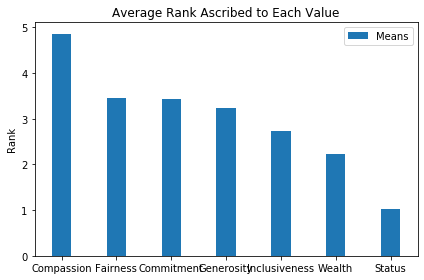

In [8]:
labels = [
    'Compassion',
    'Fairness',
    'Commitment',
    'Generosity',
    'Inclusiveness',
    'Wealth',
    'Status',
]

means = [
    7 - np.mean(clean_data["CompassionRank"]),
    7 - np.mean(clean_data["FairnessRank"]),
    7 - np.mean(clean_data["CommitmentRank"]),
    7 - np.mean(clean_data["GenerosityRank"]),
    7 - np.mean(clean_data["InclusivenessRank"]),
    7 - np.mean(clean_data["WealthRank"]),
    7 - np.mean(clean_data["StatusRank"])
]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, means, width, label='Means')
ax.set_ylabel('Rank')
ax.set_title('Average Rank Ascribed to Each Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

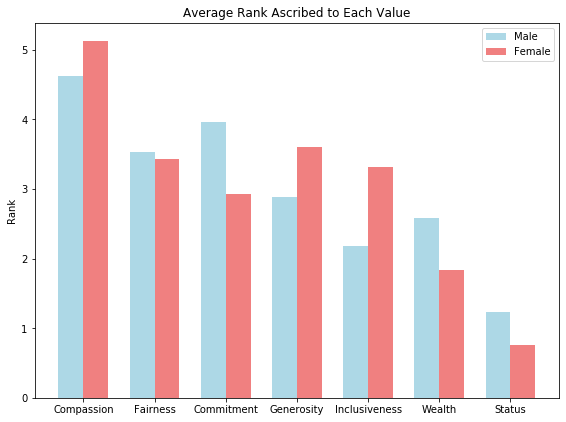

In [65]:
male_data = clean_data[clean_data['Gender'] == 'Male']
female_data = clean_data[clean_data['Gender'] == 'Female']


male_means = [
    7 - np.mean(male_data["CompassionRank"]),
    7 - np.mean(male_data["FairnessRank"]),
    7 - np.mean(male_data["CommitmentRank"]),
    7 - np.mean(male_data["GenerosityRank"]),
    7 - np.mean(male_data["InclusivenessRank"]),
    7 - np.mean(male_data["WealthRank"]),
    7 - np.mean(male_data["StatusRank"])
]

female_means = [
    7 - np.mean(female_data["CompassionRank"]),
    7 - np.mean(female_data["FairnessRank"]),
    7 - np.mean(female_data["CommitmentRank"]),
    7 - np.mean(female_data["GenerosityRank"]),
    7 - np.mean(female_data["InclusivenessRank"]),
    7 - np.mean(female_data["WealthRank"]),
    7 - np.mean(female_data["StatusRank"])
]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, male_means, width, label='Male', color = "LightBlue")
rects1 = ax.bar(x + width/2, female_means, width, label='Female', color = "LightCoral")
ax.set_ylabel('Rank')
ax.set_title('Average Rank Ascribed to Each Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout(pad=-6, w_pad=6)
plt.show()

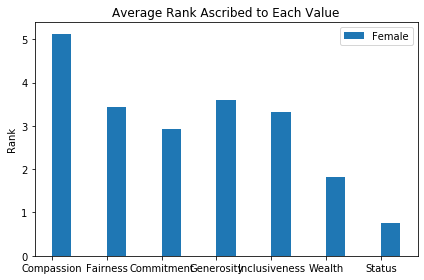

In [17]:
male_data = clean_data[clean_data['Gender'] == 'Male']
female_data = clean_data[clean_data['Gender'] == 'Female']


male_means = [
    7 - np.mean(male_data["CompassionRank"]),
    7 - np.mean(male_data["FairnessRank"]),
    7 - np.mean(male_data["CommitmentRank"]),
    7 - np.mean(male_data["GenerosityRank"]),
    7 - np.mean(male_data["InclusivenessRank"]),
    7 - np.mean(male_data["WealthRank"]),
    7 - np.mean(male_data["StatusRank"])
]

female_means = [
    7 - np.mean(female_data["CompassionRank"]),
    7 - np.mean(female_data["FairnessRank"]),
    7 - np.mean(female_data["CommitmentRank"]),
    7 - np.mean(female_data["GenerosityRank"]),
    7 - np.mean(female_data["InclusivenessRank"]),
    7 - np.mean(female_data["WealthRank"]),
    7 - np.mean(female_data["StatusRank"])
]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, male_means, width, label='Male')
rects1 = ax.bar(x + width/2, female_means, width, label='Female')
ax.set_ylabel('Rank')
ax.set_title('Average Rank Ascribed to Each Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()